# Imports

In [1]:
# Reload modules before executing code
%load_ext autoreload
%autoreload 2

import os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from utils import *

# Expand the '~' to the full path of the home directory
home_directory = os.path.expanduser('~')

#######################################
# config_file = 'config_julia_concept.yml'
config_file = 'config_julia_hybrid_mlp32x5bosh3.yml'

# Load config and create folders

In [2]:
cfg = load_config(Path(config_file))

results_folder = Path(cfg['results_folder'])
periods = cfg['periods']
metrics = cfg['metrics']
threshold_dict = cfg['threshold_dict']
metrics_path, results_path = load_results_path(results_folder, periods)
plots_folder = Path(cfg['plots_folder'])
graph_title = cfg['graph_title']

# Plot (and compute metrics if needed)

Found 215 files for period train


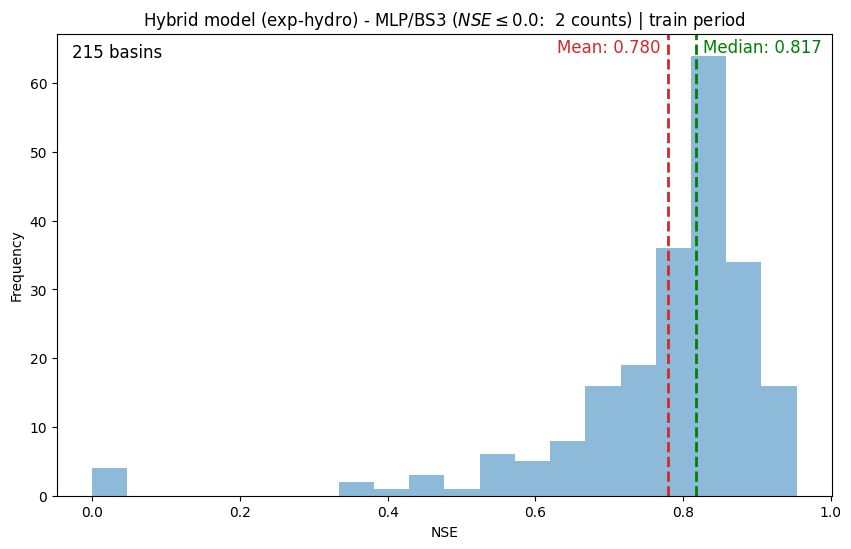

Found 215 files for period test


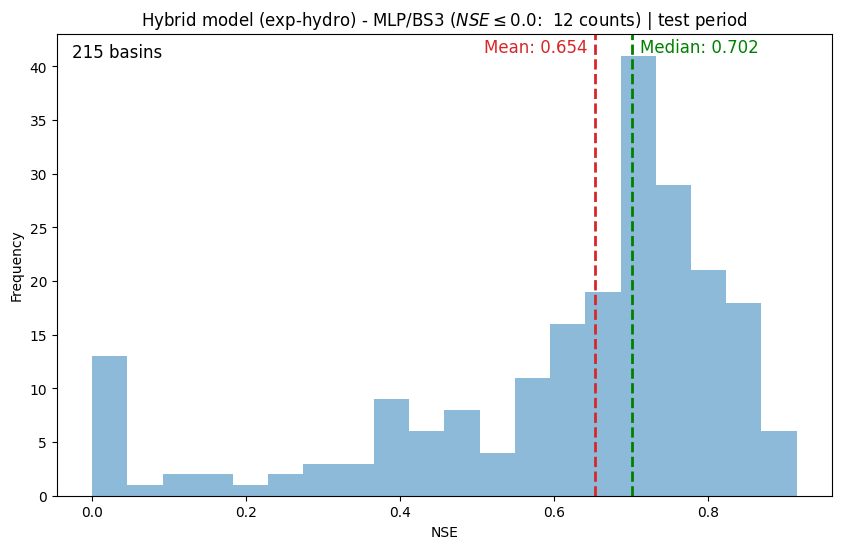

In [3]:
# Assuming results_path, periods, metrics, threshold_dict, and plots_folder are defined
for period in periods:

    metric_file_path = metrics_path / f'metrics_{period}.csv'

    # Check if the file exists and is not empty
    if metric_file_path.exists() and metric_file_path.stat().st_size <= 2:
        metric_file_path.unlink()  # Deletes the file

    # Check if the file exists and is not empty
    if not metric_file_path.exists():
        df_period = metrics_from_julia_results(metrics, period, results_path, metrics_path)
    else:
        df_period = pd.read_csv(metrics_path / f'metrics_{period}.csv')

    for metric in metrics:
        
        # Plot the histograms
        plot_metric_histogram(df_period, metric, threshold_dict, graph_title, period, plots_folder)